In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
torch.cuda.is_available()

True

### Hyper-Parameters

In [2]:
batch_size = 4
lr = 0.001
num_epochs = 10
seed = 42
model_path = './model.ckpt' 
momentum = 0.1

In [3]:
def same_seeds(seed):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  
    np.random.seed(seed)  
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    
same_seeds(seed)

### Load Data

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
device=torch.device('cuda:0')

### Define Network

In [6]:
class LeNet(torch.nn.Module):
	def __init__(self):
		super().__init__()
		self.conv1 = torch.nn.Conv2d(3, 6, 5)
		self.pool = torch.nn.MaxPool2d(2, 2)
		self.conv2 = torch.nn.Conv2d(6, 16, 5)
		self.fc1 = torch.nn.Linear(16 * 5 * 5, 120)
		self.fc2 = torch.nn.Linear(120, 84)
		self.fc3 = torch.nn.Linear(84, 10)

	def forward(self, x):
		x = self.pool(F.relu(self.conv1(x)))
		x = self.pool(F.relu(self.conv2(x)))
		x = torch.flatten(x, 1)
		x = F.relu(self.fc1(x))
		x = F.relu(self.fc2(x))
		x = self.fc3(x)
		return x
	
net = LeNet().to(device)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

### Train Data

In [8]:
loss_data = []
acc_data = []

for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch + 1, num_epochs))
    train_acc, train_loss = 0.0, 0.0
    total = 0
    net.train()
    for i, data in tqdm(enumerate(trainloader, 0)):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_acc += (predicted == labels).sum().item()
        total += labels.size(0)
        if i % 2500 == 2499:
            print('[%d, %5d] loss: %.3f' %
				  (epoch + 1, i + 1, train_loss / (i + 1)))
    
    loss_data.append(train_loss / total)
    acc_data.append(train_acc / total)
    

print('Finished Training')
print('loss_data = ', loss_data)
print('acc_data = ', acc_data)


Epoch 1/10


2545it [00:08, 325.47it/s]

[1,  2500] loss: 2.303


5036it [00:16, 306.06it/s]

[1,  5000] loss: 2.300


7560it [00:24, 304.34it/s]

[1,  7500] loss: 2.292


10057it [00:32, 288.12it/s]

[1, 10000] loss: 2.263


12500it [00:40, 305.00it/s]

[1, 12500] loss: 2.219
Epoch 2/10



2547it [00:08, 297.83it/s]

[2,  2500] loss: 1.949


5039it [00:17, 296.71it/s]

[2,  5000] loss: 1.903


7550it [00:25, 312.53it/s]

[2,  7500] loss: 1.867


10037it [00:33, 292.45it/s]

[2, 10000] loss: 1.831


12500it [00:42, 296.85it/s]

[2, 12500] loss: 1.799
Epoch 3/10



2563it [00:08, 313.92it/s]

[3,  2500] loss: 1.621


5043it [00:16, 313.12it/s]

[3,  5000] loss: 1.597


7531it [00:24, 293.17it/s]

[3,  7500] loss: 1.586


10060it [00:33, 310.82it/s]

[3, 10000] loss: 1.579


12500it [00:41, 300.87it/s]

[3, 12500] loss: 1.565
Epoch 4/10



2537it [00:08, 302.30it/s]

[4,  2500] loss: 1.508


5057it [00:16, 306.27it/s]

[4,  5000] loss: 1.492


7541it [00:25, 296.68it/s]

[4,  7500] loss: 1.480


10052it [00:33, 285.58it/s]

[4, 10000] loss: 1.473


12500it [00:41, 298.37it/s]

[4, 12500] loss: 1.465
Epoch 5/10



2535it [00:09, 268.66it/s]

[5,  2500] loss: 1.428


5041it [00:19, 261.91it/s]

[5,  5000] loss: 1.406


7548it [00:28, 285.72it/s]

[5,  7500] loss: 1.395


10037it [00:37, 282.94it/s]

[5, 10000] loss: 1.391


12500it [00:45, 272.79it/s]

[5, 12500] loss: 1.384
Epoch 6/10



2538it [00:09, 249.24it/s]

[6,  2500] loss: 1.329


5057it [00:18, 300.59it/s]

[6,  5000] loss: 1.322


7535it [00:27, 280.89it/s]

[6,  7500] loss: 1.323


10038it [00:37, 253.72it/s]

[6, 10000] loss: 1.317


12500it [00:46, 268.14it/s]

[6, 12500] loss: 1.311
Epoch 7/10



2536it [00:09, 284.44it/s]

[7,  2500] loss: 1.265


5032it [00:19, 221.33it/s]

[7,  5000] loss: 1.256


7558it [00:30, 289.52it/s]

[7,  7500] loss: 1.247


10049it [00:40, 265.07it/s]

[7, 10000] loss: 1.247


12500it [00:50, 247.39it/s]

[7, 12500] loss: 1.246
Epoch 8/10



2554it [00:08, 293.34it/s]

[8,  2500] loss: 1.206


5053it [00:17, 312.19it/s]

[8,  5000] loss: 1.203


7539it [00:25, 316.45it/s]

[8,  7500] loss: 1.196


10033it [00:33, 315.50it/s]

[8, 10000] loss: 1.194


12500it [00:41, 300.00it/s]

[8, 12500] loss: 1.190
Epoch 9/10



2545it [00:08, 318.99it/s]

[9,  2500] loss: 1.150


5038it [00:17, 271.96it/s]

[9,  5000] loss: 1.155


7562it [00:25, 308.98it/s]

[9,  7500] loss: 1.155


10032it [00:34, 267.45it/s]

[9, 10000] loss: 1.152


12500it [00:42, 294.10it/s]

[9, 12500] loss: 1.144
Epoch 10/10



2533it [00:08, 303.86it/s]

[10,  2500] loss: 1.101


5030it [00:17, 286.65it/s]

[10,  5000] loss: 1.105


7532it [00:25, 284.82it/s]

[10,  7500] loss: 1.102


10057it [00:33, 304.15it/s]

[10, 10000] loss: 1.103


12500it [00:41, 298.16it/s]

[10, 12500] loss: 1.103
Finished Training
loss_data =  [0.5547180366039276, 0.44965555717110633, 0.3913175219577551, 0.3662799931845069, 0.3460814353391528, 0.32785636512309313, 0.31160283065989614, 0.2975410263761878, 0.28593869483046236, 0.2757429049862921]
acc_data =  [0.17562, 0.34492, 0.4279, 0.46958, 0.50096, 0.5289, 0.55562, 0.57606, 0.5932, 0.6087]


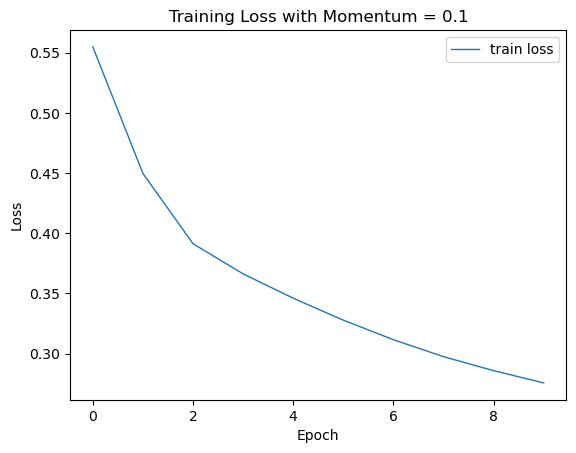

In [9]:
x_train_loss = range(num_epochs)
y_train_loss = loss_data
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss with Momentum = 0.1')
plt.plot(x_train_loss, y_train_loss, linewidth=1, linestyle='solid', label='train loss')
plt.legend()
plt.show()

In [10]:
torch.save(net.state_dict(), model_path)

### Test Data

In [11]:
correct, total = 0, 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
with torch.no_grad():
	for data in testloader:
		images, labels = data[0].to(device), data[1].to(device)
		outputs = net(images)
		_, predicted = torch.max(outputs.data, 1)
		total += labels.size(0)
		correct += (predicted == labels).sum().item()
		for label, prediction in zip(labels, predicted):
			if label == prediction:
				correct_pred[classes[label]] += 1
			total_pred[classes[label]] += 1

print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))

for classname, correct_count in correct_pred.items():
	accuracy = 100 * float(correct_count) / total_pred[classname]
	print("Accuracy for class {:5s} is: {:.1f} %.".format(classname, accuracy))

Accuracy of the network on the 10000 test images: 60.37 %
Accuracy for class plane is: 70.6 %.
Accuracy for class car   is: 72.4 %.
Accuracy for class bird  is: 47.9 %.
Accuracy for class cat   is: 36.5 %.
Accuracy for class deer  is: 60.4 %.
Accuracy for class dog   is: 52.1 %.
Accuracy for class frog  is: 65.5 %.
Accuracy for class horse is: 63.8 %.
Accuracy for class ship  is: 73.1 %.
Accuracy for class truck is: 61.4 %.
